[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cleanlab/cleanvision-examples/blob/main/caltech256.ipynb)

This notebook runs CleanVision on [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset.

In [1]:
!pip install -U pip
!pip install git+https://github.com/cleanlab/cleanvision.git
!pip install datasets

In [2]:
import pandas as pd
from datasets import load_dataset
import os
from tqdm import tqdm

from cleanvision.imagelab import Imagelab

/Users/sanjana/opt/anaconda3/envs/pkgtest/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Download dataset from Huggingface and save as png files

In [3]:
dataset = load_dataset("cifar10")

train_dir = "cifar10png/train"
test_dir = "cifar10png/test"

get_class_name = dataset['train'].features['label'].int2str

for i in range(10):
    class_name = get_class_name(i)
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
    
for i in tqdm(range(len(dataset['train']))):
    class_name = get_class_name(dataset['train'][i]['label'])
    im = dataset['train'][i]['img'].save(os.path.join(train_dir, class_name, f"train_{i}.png"))
    
for i in tqdm(range(len(dataset['test']))):
    class_name = get_class_name(dataset['test'][i]['label'])
    im = dataset['test'][i]['img'].save(os.path.join(test_dir, class_name, f"test_{i}.png"))

Found cached dataset cifar10 (/Users/sanjana/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4)
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:12<00:00, 811.70it/s]


### Run CleanVision

In [4]:
imagelab = Imagelab(data_path="./cifar10png/")

Reading images from /Users/sanjana/cleanlab_home/cleanvision-examples/cifar10png


In [5]:
imagelab.find_issues()

Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale images ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60000/60000 [00:29<00:00, 2020.08it/s]


Issue checks completed. To see a detailed report of issues found, use imagelab.report().


### Report all the issues found in the dataset

Issues found in order of severity in the dataset

|    | issue_type      |   num_images |
|---:|:----------------|-------------:|
|  0 | near_duplicates |           40 |
|  1 | dark            |           29 |
|  2 | light           |            3 |
|  3 | low_information |            1 | 


Top 4 sets of images with near_duplicates issue
Set: 0


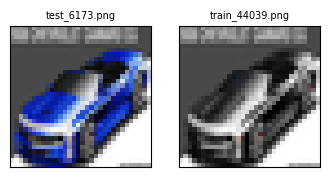

Set: 1


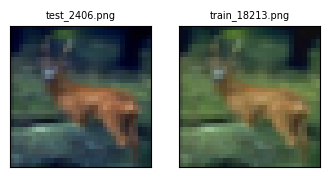

Set: 2


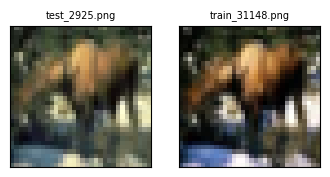

Set: 3


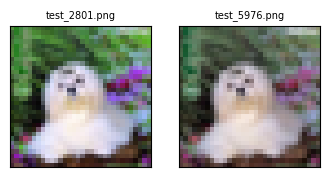


Top 4 examples with dark issue in the dataset.


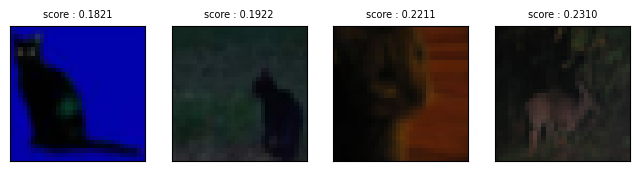

Found 3 examples with light issue in the dataset.


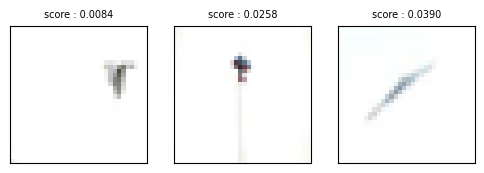

Found 1 example with low_information issue in the dataset.


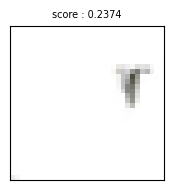

In [6]:
imagelab.report()

View more information about each image, such as what types of issues it exhibits and its quality score with respect to each type of issue.

In [7]:
imagelab.issues

,odd_aspect_ratio_score,is_odd_aspect_ratio_issue,low_information_score,is_low_information_issue,light_score,is_light_issue,grayscale_score,is_grayscale_issue,dark_score,is_dark_issue,blurry_score,is_blurry_issue,is_exact_duplicates_issue,is_near_duplicates_issue
/Users/sanjana/cleanlab_home/cleanvision-examples/cifar10png/test/airplane/test_10.png,1.0,False,0.715654,False,0.536786,False,1,False,0.815987,False,0.429291,False,False,False
/Users/sanjana/cleanlab_home/cleanvision-examples/cifar10png/test/airplane/test_1001.png,1.0,False,0.807909,False,0.890804,False,1,False,0.700727,False,0.443643,False,False,False
/Users/sanjana/cleanlab_home/cleanvision-examples/cifar10png/test/airplane/test_1010.png,1.0,False,0.728821,False,0.541385,False,1,False,0.828174,False,0.469040,False,False,False
/Users/sanjana/cleanlab_home/cleanvision-examples/cifar10png/test/airplane/test_1018.png,1.0,False,0.675271,False,0.581848,False,1,False,0.805273,False,0.392886,False,False,False
/Users/sanjana/cleanlab_home/cleanvision-examples/cifar10png/test/airplane/test_1022.png,1.0,False,0.757625,False,0.607843,False,1,False,0.890196,False,0.533907,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/Users/sanjana/cleanlab_home/cleanvision-examples/cifar10png/train/truck/train_9934.png,1.0,False,0.834427,False,0.782945,False,1,False,1.000000,False,0.588180,False,False,False
/Users/sanjana/cleanlab_home/cleanvision-examples/cifar10png/train/truck/train_9955.png,1.0,False,0.868609,False,0.791812,False,1,False,0.810393,False,0.510772,False,False,False
/Users/sanjana/cleanlab_home/cleanvision-examples/cifar10png/train/truck/train_998.png,1.0,False,0.880049,False,0.887374,False,1,False,0.988555,False,0.605363,False,False,False
/Users/sanjana/cleanlab_home/cleanvision-examples/cifar10png/train/truck/train_9984.png,1.0,False,0.911363,False,0.940628,False,1,False,0.870977,False,0.505376,False,False,False


View global information about each issue, such as how many images in the dataset suffer from this issue.

In [8]:
imagelab.issue_summary

,issue_type,num_images
0,near_duplicates,40
1,dark,29
2,light,3
3,low_information,1
4,blurry,0
5,grayscale,0
6,odd_aspect_ratio,0
7,exact_duplicates,0


View number of sets of near duplicate images

In [11]:
imagelab.info['near_duplicates']['num_sets']

20

Visualize 20 sets of near duplicate images


Top 20 sets of images with near_duplicates issue
Set: 0


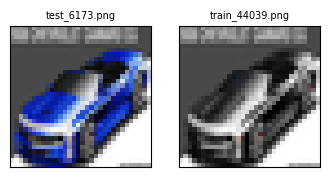

Set: 1


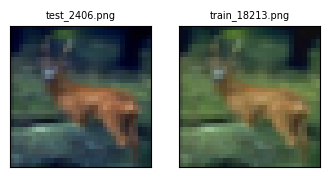

Set: 2


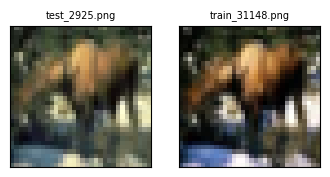

Set: 3


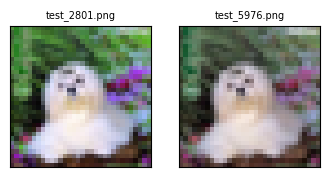

Set: 4


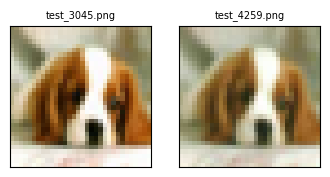

Set: 5


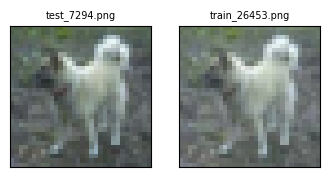

Set: 6


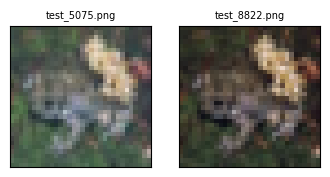

Set: 7


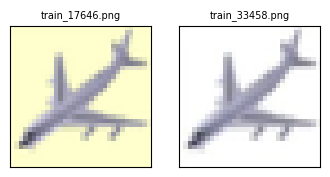

Set: 8


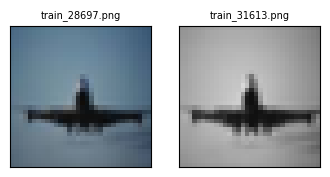

Set: 9


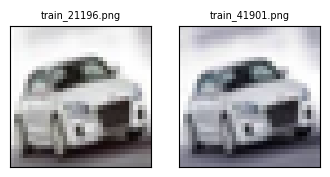

Set: 10


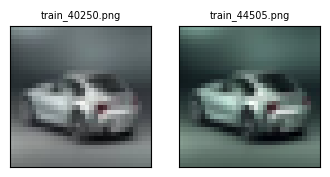

Set: 11


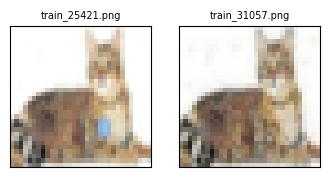

Set: 12


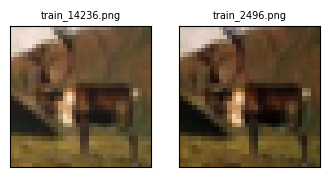

Set: 13


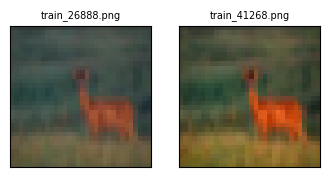

Set: 14


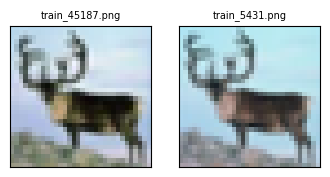

Set: 15


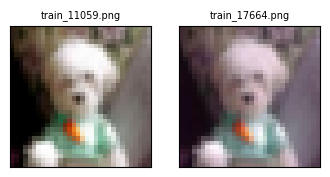

Set: 16


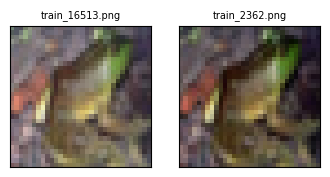

Set: 17


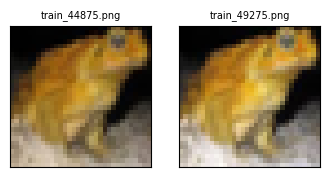

Set: 18


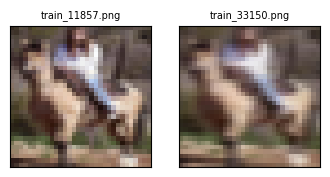

Set: 19


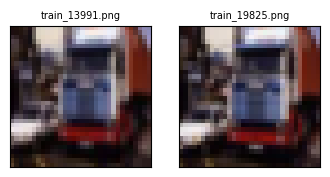

In [12]:
imagelab.visualize(issue_types=['near_duplicates'], num_images=20)